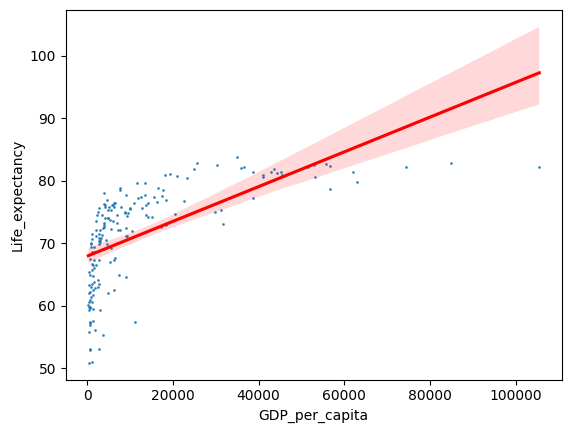

In [4]:
import pandas
import seaborn
import numpy
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

data = pandas.read_csv("Life-Expectancy-Data-Updated.csv")
data=data[data["Year"]==2015]
g = seaborn.regplot(data, x="GDP_per_capita", y="Life_expectancy", scatter_kws={"s": 1}, line_kws={"color":"r"})

In [2]:
data

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.32,97,65,27.8,...,97,0.08,11006,78.53,4.9,4.8,7.8,0,1,76.5
1,Spain,European Union,2015,2.7,3.3,57.9025,10.35,97,94,26.0,...,97,0.09,25742,46.44,0.6,0.5,9.7,1,0,82.8
6,Russian Federation,Rest of Europe,2015,6.6,8.2,223.0000,8.06,97,97,26.2,...,97,0.08,9313,144.10,2.3,2.3,12.0,0,1,71.2
27,Cameroon,Africa,2015,57.0,88.0,340.1265,4.55,84,64,24.3,...,84,1.12,1383,23.30,5.6,5.5,6.1,0,1,57.6
43,"Gambia, The",Africa,2015,39.7,59.8,261.7065,2.69,97,64,23.9,...,97,0.96,661,2.09,7.3,7.2,3.4,0,1,60.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2753,Tunisia,Africa,2015,14.8,17.2,91.3430,1.50,98,98,26.3,...,98,0.04,4095,11.18,6.5,6.4,7.0,0,1,75.9
2820,"Venezuela, RB",South America,2015,16.4,19.1,141.5540,6.21,87,83,26.7,...,87,0.40,17318,30.08,1.6,1.5,10.1,0,1,72.6
2840,Djibouti,Africa,2015,54.6,65.8,251.7490,0.32,84,82,24.0,...,84,0.22,2653,0.91,5.6,5.4,4.1,0,1,64.1
2846,Nicaragua,Central America and Caribbean,2015,16.6,19.4,148.4805,3.72,98,83,27.2,...,98,0.11,2050,6.22,1.8,1.7,6.5,0,1,73.6


In [8]:
formula = "Life_expectancy ~ GDP_per_capita+Schooling+Incidents_HIV+Diphtheria+Polio+BMI+Measles"
mod = smf.ols(formula=formula, data=data)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_expectancy   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     92.03
Date:                Sun, 04 Jun 2023   Prob (F-statistic):           1.22e-54
Time:                        03:13:31   Log-Likelihood:                -482.13
No. Observations:                 179   AIC:                             980.3
Df Residuals:                     171   BIC:                             1006.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         37.9443      4.016      9.449      0.000      30.018      45.871
GDP_per_capita     0.0001   1.96e-05      5.565      0.000    7.05e-05       0.000
Schooling          0.8445      0.146      5.791      0.000       0.557       1.132
Incidents_HIV     -1.4128      0.173     -8.154      0.000      -1.755      -1.071
Diphtheria        -0.0035      0.051     -0.067      0.946      -0.105       0.098
Polio              0.1385      0.060      2.304      0.022       0.020       0.257
BMI                0.4254      0.161      2.646      0.009       0.108       0.743
Measles            0.0390      0.023      1.731      0.085      -0.005       0.083
==============================================================================
Omnibus:                        3.894   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.143   Jarque-Bera (JB):                3.965
Skew:                          -0.347   Prob(JB):                        0.138
Kurtosis:                       2.774   Cond. No.                     3.19e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.19e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [3]:
data_x = data[["GDP_per_capita","Schooling","Incidents_HIV","Diphtheria","Polio","BMI","Measles"]]
data_x = sm.add_constant(data_x)

rlm_model = sm.RLM(data["Life_expectancy"], data_x)
rlm_results = rlm_model.fit()
rlm_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:        Life_expectancy   No. Observations:                  179
Model:                            RLM   Df Residuals:                      171
Method:                          IRLS   Df Model:                            7
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Wed, 07 Jun 2023                                         
Time:                        22:57:39                                         
No. Iterations:                    19                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             39.2196      4.172      9.400      0.000      31.042      47.397
GDP_per_capita     0.0001   2.04e-05      5.095      0.000    6.39e-05       0.000
Schooling          0.8547      0.152      5.641      0.000       0.558       1.152
Incidents_HIV     -1.4564      0.180     -8.091      0.000      -1.809      -1.104
Diphtheria        -0.0061      0.053     -0.115      0.909      -0.111       0.098
Polio              0.1387      0.062      2.221      0.026       0.016       0.261
BMI                0.3829      0.167      2.292      0.022       0.055       0.710
Measles            0.0409      0.023      1.745      0.081      -0.005       0.087
==================================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

In [5]:
data["LNlife_expectancy"] = numpy.log(data["Life_expectancy"])
formula = "LNlife_expectancy ~ GDP_per_capita+Schooling+Incidents_HIV+Diphtheria+Polio+BMI+Measles"
mod = smf.ols(formula=formula, data=data)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      LNlife_expectancy   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     87.71
Date:                Wed, 07 Jun 2023   Prob (F-statistic):           3.01e-53
Time:                        23:11:54   Log-Likelihood:                 270.50
No. Observations:                 179   AIC:                            -525.0
Df Residuals:                     171   BIC:                            -499.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.7483      0.060     62.537      0.000       3.630       3.867
GDP_per_capita  1.348e-06   2.93e-07      4.603      0.000     7.7e-07    1.93e-06
Schooling          0.0123      0.002      5.661      0.000       0.008       0.017
Incidents_HIV     -0.0219      0.003     -8.485      0.000      -0.027      -0.017
Diphtheria        -0.0001      0.001     -0.170      0.865      -0.002       0.001
Polio              0.0023      0.001      2.552      0.012       0.001       0.004
BMI                0.0070      0.002      2.898      0.004       0.002       0.012
Measles            0.0005      0.000      1.453      0.148      -0.000       0.001
==============================================================================
Omnibus:                        8.207   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.017   Jarque-Bera (JB):                8.151
Skew:                          -0.515   Prob(JB):                       0.0170
Kurtosis:                       3.177   Cond. No.                     3.19e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.19e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""